# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [2]:
df = pd.read_csv('RTA_Dataset.csv')
df

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3       1:06:00      Sunday              18-30          Male   
4       1:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee         Above 10yr   
2      Junior high school                Employee              1-2yr   
3      Junior high school                Employee             5-10yr   
4      Junior high school                Employee              2-5yr   
...                   ...                     ...                ...   
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

           Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
0               Automobile            Owner              Above 10yr  ...   
1      Public (> 45 seats)            Owner                 5-10yrs  ...   
2          Lorry (41?100Q)            Owner                     NaN  ...   
3      Public (> 45 seats)     Governmental                     NaN  ...   
4                      NaN            Owner                 5-10yrs  ...   
...                    ...              ...                     ...  ...   
12311       Lorry (11?40Q)            Owner                     NaN  ...   
12312           Automobile            Owner                     NaN  ...   
12313                Bajaj            Owner                  2-5yrs  ...   
12314      Lorry (41?100Q)            Owner                  2-5yrs  ...   
12315                Other            Owner                  2-5yrs  ...   

      Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
0       Going straight               na              na                   na   
1       Going straight               na              na                   na   
2       Going straight  Driver or rider            Male                31-50   
3       Going straight       Pedestrian          Female                18-30   
4       Going straight               na              na                   na   
...                ...              ...             ...                  ...   
12311   Going straight               na              na                   na   
12312            Other               na              na                   na   
12313            Other  Driver or rider            Male                31-50   
12314            Other               na              na                   na   
12315         Stopping       Pedestrian          Female                    5   

      Casualty_severity Work_of_casuality Fitness_of_casuality  \
0                    na               NaN                  NaN   
1                    na               NaN                  NaN   
2                     3            Driver                  NaN   
3                     3            Driver               Normal   
4                    na               NaN                  NaN   
...                 ...               ...                  ...   
12311                na            Driver

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
df.shape

(12316, 32)

In [3]:
df.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [4]:
df.tail()

Time Day_of_week Age_band_of_driver Sex_of_driver  \
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
12311   Lorry (11?40Q)            Owner                     NaN  ...   
12312       Automobile            Owner                     NaN  ...   
12313            Bajaj            Owner                  2-5yrs  ...   
12314  Lorry (41?100Q)            Owner                  2-5yrs  ...   
12315            Other            Owner                  2-5yrs  ...   

      Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
12311   Going straight               na              na                   na   
12312            Other               na              na                   na   
12313            Other  Driver or rider            Male                31-50   
12314            Other               na              na                   na   
12315         Stopping       Pedestrian          Female                    5   

      Casualty_severity Work_of_casuality Fitness_of_casuality  \
12311                na            Driver               Normal   
12312                na            Driver               Normal   
12313                 3            Driver               Normal   
12314                na            Driver               Normal   
12315                 3            Driver               Normal   

                                     Pedestrian_movement  \
12311                                   Not a Pedestrian   
12312                                   Not a Pedestrian   
12313                                   Not a Pedestrian   
12314                                   Not a Pedestrian   
12315  Crossing from nearside - masked by parked or s...   

                          Cause_of_accident Accident_severity  
12311                         No distancing     Slight Injury  
12312                         No distancing     Slight Injury  
12313            Changing lane to the right    Serious Injury  
12314  Driving under the influence of drugs     Slight Injury  
12315            Changing lane to the right     Slight Injury  

[5 rows x 32 columns]

In [5]:
df.describe()

Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

In [6]:
df.sample(8)

Time Day_of_week Age_band_of_driver Sex_of_driver  \
2399   9:51:00     Tuesday              31-50          Male   
1690  13:00:00     Tuesday              31-50          Male   
2480   8:30:00      Sunday              31-50          Male   
8440  17:19:00     Tuesday            Over 51          Male   
5782   5:42:00      Monday            Over 51          Male   
3952  11:30:00   Wednesday            Unknown          Male   
4389  14:18:00      Sunday              18-30          Male   
3858  11:15:00      Monday            Unknown          Male   

       Educational_level Vehicle_driver_relation Driving_experience  \
2399  Junior high school                   Owner             5-10yr   
1690  Junior high school                Employee             5-10yr   
2480  Junior high school                Employee         Above 10yr   
8440  Junior high school                   Other          Below 1yr   
5782   Elementary school                Employee              2-5yr   
3952  Junior high school                   Owner              1-2yr   
4389  Junior high school                Employee              2-5yr   
3858   Elementary school                Employee              2-5yr   

           Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
2399            Automobile            Owner              Above 10yr  ...   
1690     Public (12 seats)            Owner              Above 10yr  ...   
2480          Stationwagen              NaN                     NaN  ...   
8440                 Other            Owner                 5-10yrs  ...   
5782            Automobile            Owner                 Unknown  ...   
3952  Public (13?45 seats)            Owner                 Unknown  ...   
4389                   NaN            Owner                 Unknown  ...   
3858        Lorry (11?40Q)            Owner                     NaN  ...   

     Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
2399   Going straight  Driver or rider            Male                31-50   
1690  Moving Backward       Pedestrian            Male                18-30   
2480   Going straight  Driver or rider          Female              Over 51   
8440        Reversing       Pedestrian            Male             Under 18   
5782   Going straight  Driver or rider          Female                31-50   
3952   Going straight       Pedestrian          Female              Over 51   
4389              NaN  Driver or rider            Male                31-50   
3858      Getting off  Driver or rider            Male                31-50   

     Casualty_severity Work_of_casuality Fitness_of_casuality  \
2399                 3            Driver               Normal   
1690                 2            Driver               Normal   
2480                 3            Driver               Normal   
8440                 3               NaN                  NaN   
5782                 3     Self-employed               Normal   
3952                 3               NaN                  NaN   
4389                 3               NaN                  NaN   
3858                 3            Driver               Normal   

                  Pedestrian_movement           Cause_of_accident  \
2399                 Not a Pedestrian          Driving carelessly   
1690  Crossing from driver's nearside   Changing lane to the left   
2480                 Not a Pedestrian      No priority to vehicle   
8440                 Not a Pedestrian   Changing lane to the left   
5782                 Not a Pedestrian  Changing lane to the right   
3952                 Not a Pedestrian   No priority to pedestrian   
4389                 Not a Pedestrian               No distancing   
3858                 Not a Pedestrian               No distancing   

     Accident_severity  
2399     Slight Injury  
1690     Slight Injury  
2480     Slight Injury  
8440     Slight Injury  
5782     Slight Injury  
3952     Slight Injury  
4389     Slight Injury

In [7]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality           2635
Pedestrian_movement               0
Cause_of_accident                 0
Accident_severity                 0
dtype: int64

In [9]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_severity              object
Work_of_casuality              object
Fitness_of_casuality           object
Pedestrian_movement            object
Cause_of_accident              object
Accident_severity              object
dtype: object

In [8]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality           2635
Pedestrian_movement               0
Cause_of_accident                 0
Accident_severity                 0
dtype: int64

In [ ]:
df.duplicated().sum()

0

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [10]:
categorical_cols = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level' , 'Type_of_vehicle', 'Owner_of_vehicle',
                    'Service_year_of_vehicle', 'Defect_of_vehicle', 'Lanes_or_Medians' , 'Road_allignment', 'Types_of_Junction',
                    'Road_surface_type', 'Road_surface_conditions' , 'Light_conditions' , 'Weather_conditions' , 'Type_of_collision',
                    'Cause_of_accident' , 'Area_accident_occured' , 'Driving_experience']


In [11]:
for col in categorical_cols:
  mode_result = df[col].mode()
if not mode_result.empty:
    df[col] = df[col].fillna(mode_result[0])
else:
    print(f"Warning: No mode found for column '{col}'. Skipping filling missing values.")

In [12]:
print(df.isnull().sum())


Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience                0
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [13]:
numerical_cols = ['Number_of_vehicles_involved' , 'Number_of_casualties']

In [14]:
scaler = MinMaxScaler()

In [15]:
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df.head())

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [16]:
label_encoder = LabelEncoder()
for col in categorical_cols:
  df[col] = label_encoder.fit_transform(df[col])
  print(df.head())

       Time  Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00            1              18-30          Male   Above high school   
1  17:02:00            1              31-50          Male  Junior high school   
2  17:02:00            1              18-30          Male  Junior high school   
3   1:06:00            3              18-30          Male  Junior high school   
4   1:06:00            3              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner            

In [17]:
enc = preprocessing.OneHotEncoder()
categorical_features = ['Day_of_week' , 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level' , 'Type_of_vechicle' , 'Owner_of_vehicle' ,
                        'Service_year_of_vehicle' ,'Defect_of_vehicle' , 'Lanes_or_Medians' , 'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
                                 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
                                 'Type_of_collision', 'Cause_of_accident', 'Area_accident_occured',
                                 'Driving_experience']
enc.fit(df[categorical_cols])

sample_row = df[categorical_cols].iloc[0].values.reshape(1,-1)

transformed_data = enc.transform(sample_row).toarray()
print(transformed_data)

[[0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


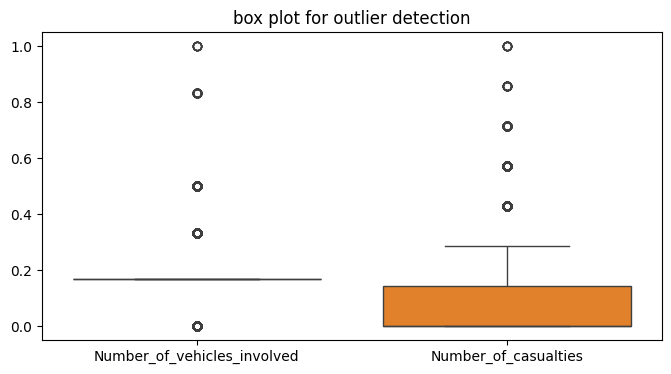

In [18]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[numerical_cols])
plt.title('box plot for outlier detection')
plt.show()

In [19]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df[numerical_cols] = np.clip(df[numerical_cols], lower, upper , axis=0)


In [20]:
numerical_cols

['Number_of_vehicles_involved', 'Number_of_casualties']

In [21]:
df[numerical_cols] = df[numerical_cols].dropna()

In [27]:
numerical_cols = ['Day_of_week', 'Age_band_of_driver', 'Number_of_vehicles_involved']  # Replace ... with actual column names
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
print(df[numerical_cols].isnull().sum())

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[numerical_cols])
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

Day_of_week                        0
Age_band_of_driver                 0
Number_of_vehicles_involved    12316
dtype: int64


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

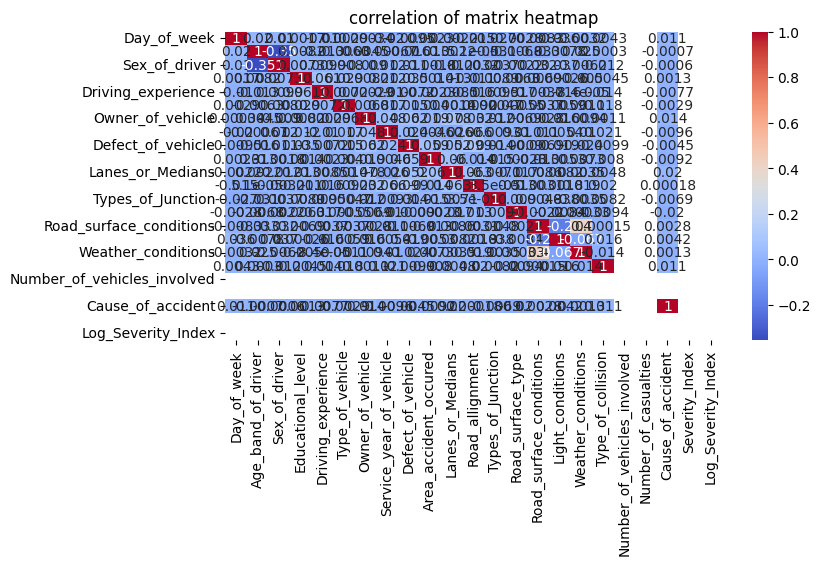

In [24]:
numerical_cols = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 4))
sns.heatmap(numerical_cols.corr() , annot=True , cmap='coolwarm')
plt.title('correlation of matrix heatmap')
plt.show()

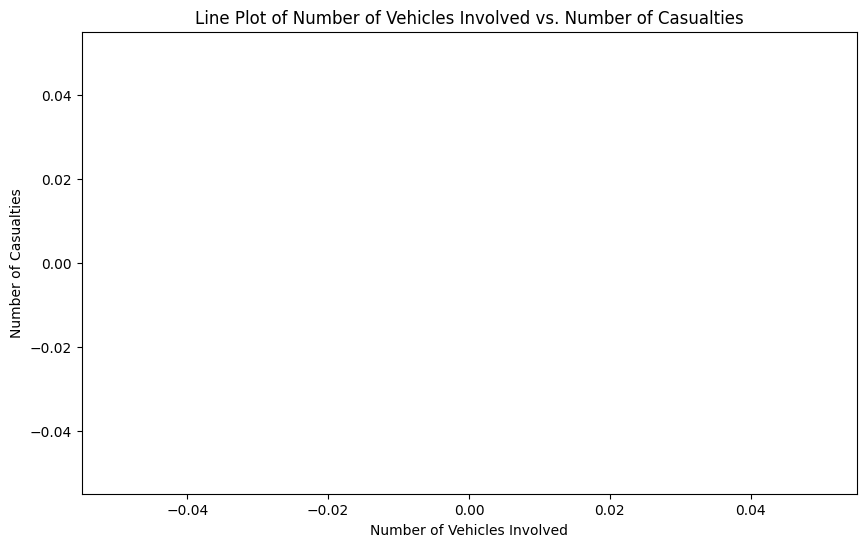

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Number_of_vehicles_involved', y='Number_of_casualties', data=df)
plt.title('Line Plot of Number of Vehicles Involved vs. Number of Casualties')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of Casualties')
plt.show()


12316
12316


<ipython-input-29-63830abc17e5>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Number_of_vehicles_involved'] = df['Number_of_vehicles_involved'].fillna(method='ffill')
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

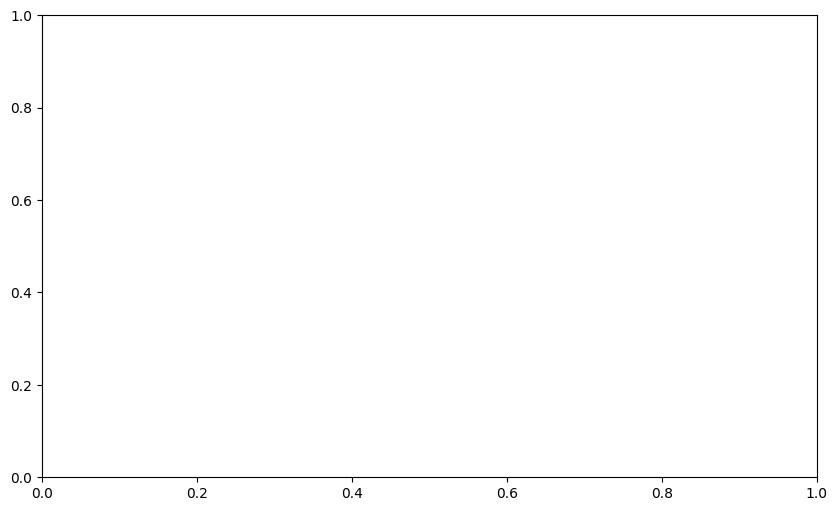

In [29]:
print(df['Number_of_vehicles_involved'].isnull().sum())

df['Number_of_vehicles_involved'] = df['Number_of_vehicles_involved'].fillna(method='ffill')

print(df['Number_of_vehicles_involved'].isnull().sum())

plt.figure(figsize=(10, 6))
plt.hist(df['Number_of_vehicles_involved'], bins=10, edgecolor='black')
plt.title('Histogram of Number of Vehicles Involved')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Frequency')
plt.show()

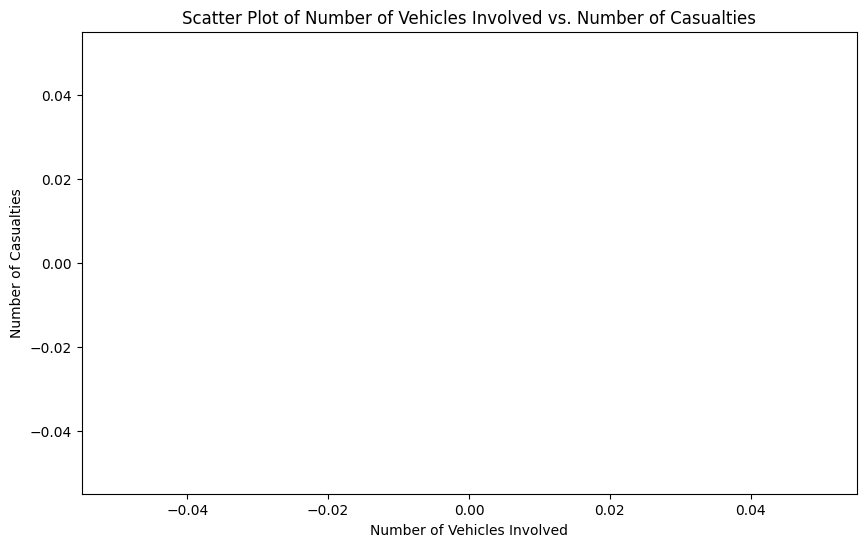

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number_of_vehicles_involved', y='Number_of_casualties', data=df)
plt.title('Scatter Plot of Number of Vehicles Involved vs. Number of Casualties')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of Casualties')
plt.show()


ValueError: List of boxplot statistics and `positions` values must have same the length

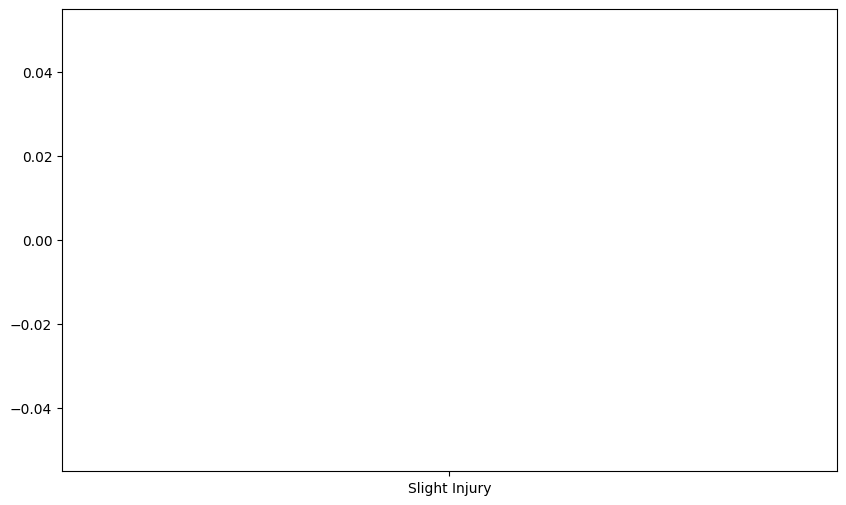

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Accident_severity', y='Number_of_casualties', data=df)
plt.title('Boxplot of Accident Severity vs. Number of Casualties')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Casualties')
plt.show()


## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [32]:

if df.empty:
    print("DataFrame is empty. Load or recreate the DataFrame.")
else:
    X = df.drop('Accident_severity', axis=1)
    y = df['Accident_severity']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train, X_test, y_train, y_test

(           Time  Day_of_week  Age_band_of_driver  Sex_of_driver  \
 6571   17:19:00            4                   4              1   
 7945   19:41:00            4                   0              1   
 9430   20:10:00            0                   1              1   
 549    13:09:00            5                   1              1   
 9290   15:50:00            4                   4              0   
 ...         ...          ...                 ...            ...   
 11964  17:45:00            6                   4              1   
 5191   17:17:00            6                   1              1   
 5390   12:19:00            6                   1              1   
 860     8:55:00            4                   2              1   
 7270    8:51:00            0                   1              1   
 
        Educational_level Vehicle_driver_relation  Driving_experience  \
 6571                   1                Employee                   4   
 7945                   4           

In [34]:
X

Time  Day_of_week  Age_band_of_driver  Sex_of_driver  \
0      17:02:00            1                   0              1   
1      17:02:00            1                   1              1   
2      17:02:00            1                   0              1   
3       1:06:00            3                   0              1   
4       1:06:00            3                   0              1   
...         ...          ...                 ...            ...   
12311  16:15:00            6                   1              1   
12312  18:00:00            3                   4              1   
12313  13:55:00            3                   2              1   
12314  13:55:00            3                   0              0   
12315  13:55:00            3                   0              1   

       Educational_level Vehicle_driver_relation  Driving_experience  \
0                      0                Employee                   0   
1                      4                Employee                   3   
2                      4                Employee                   0   
3                      4                Employee                   2   
4                      4                Employee                   1   
...                  ...                     ...                 ...   
12311                  7                Employee                   1   
12312                  1                Employee                   2   
12313                  4                Employee                   2   
12314                  4                Employee                   3   
12315                  4                Employee                   2   

       Type_of_vehicle  Owner_of_vehicle  Service_year_of_vehicle  ...  \
0                    0                 3                        3  ...   
1                   11                 3                        2  ...   
2                    5                 3                        6  ...   
3                   11                 0                        6  ...   
4                   17                 3                        2  ...   
...                ...               ...                      ...  ...   
12311                4                 3                        6  ...   
12312                0                 3                        6  ...   
12313                1                 3                        1  ...   
12314                5                 3                        1  ...   
12315                7                 3                        1  ...   

        Casualty_class  Sex_of_casualty  Age_band_of_casualty  \
0                   na               na                    na   
1                   na               na                    na   
2      Driver or rider             Male                 31-50   
3           Pedestrian           Female                 18-30   
4                   na               na                    na   
...                ...              ...                   ...   
12311               na               na                    na   
12312               na               na                    na   
12313  Driver or rider             Male                 31-50   
12314               na               na                    na   
12315       Pedestrian           Female                     5   

       Casualty_severity  Work_of_casuality  Fitness_of_casuality  \
0                     na                NaN                   NaN   
1                     na                NaN                   NaN   
2                      3             Driver                   NaN   
3                      3             Driver                Normal   
4                     na                NaN                   NaN   
...                  ...                ...                   ...   
12311                 na             Driver                Normal   
12312                 na             Driver                Normal   
12313                  3             Driver       

In [35]:
y

0         Slight Injury
1         Slight Injury
2        Serious Injury
3         Slight Injury
4         Slight Injury
              ...      
12311     Slight Injury
12312     Slight Injury
12313    Serious Injury
12314     Slight Injury
12315     Slight Injury
Name: Accident_severity, Length: 12316, dtype: object

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [44]:
def extract_hour(time_str):
    try:
        return int(time_str.split(':')[0])
    except (ValueError, AttributeError):
        return None

df['Time'] = df['Time'].apply(extract_hour)

In [45]:
df['Time']

0        17
1        17
2        17
3         1
4         1
         ..
12311    16
12312    18
12313    13
12314    13
12315    13
Name: Time, Length: 12316, dtype: int64

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)


ValueError: could not convert string to float: '17:19:00'

[link text](https://)#### Decision Tree Classifier

In [48]:
X_train['Time'] = X_train['Time'].apply(extract_hour)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Employee'

#### Support Vector Machine (SVM)

In [49]:
model = SVC()
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Employee'

#### K-Neighbors Classifier

In [50]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Employee'

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [54]:
cm = confusion_matrix(y_test, y_pred)

print(cm)


NameError: name 'y_pred' is not defined

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


NameError: name 'y_pred' is not defined

In [58]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")


NameError: name 'y_pred' is not defined

In [60]:

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")


NameError: name 'y_pred' is not defined

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: